![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# German Traffic Sign Recognition
Multi-class, single-image classification

### Dataset
The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. They cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Their benchmark has the following properties:

- Single-image, multi-class classification problem
- More than 40 classes
- More than 50,000 images in total
- Large, lifelike database

#### Notes
- For this project, we have reduced the number of images. There are around 16,500+ images in the dataset provided. You can check “label_details” folder for getting information about the classes.
- If the model is taking too much time to get trained then you can reduce the number of classes. There are around 43 classes in the dataset, model should be trained on a minimum of 15 classes.

### Initialize ImageDataGenerator (5 Marks)
- Rescale the images
- Specify value for validation_split & get 75% data in training and 25% data in training

In [31]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEYB8IEOP1YekbVQbo-47KLEqrEyNMCnQ2pulen5OJIa-dxDG4Ag04
Mounted at /content/drive


In [3]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

'2.3.0'

In [50]:
from zipfile import ZipFile 

import glob
import os
import time as time
import cv2
from PIL import Image, ImageOps
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


import matplotlib.gridspec as gridspec
import math


from PIL import Image
from datetime import timedelta
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import skimage.morphology as morp
from skimage.filters import rank

import keras

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

In [5]:
path = "/content/drive/My Drive/DATA/Computer Vision with CNN-Project2 Dataset/"

data_path = path + 'main_data-.zip'
lable_path = path + 'label_details.zip'

In [6]:
# opening the zip file in READ mode 
with ZipFile(data_path, 'r') as zip:
    zip.extractall()

In [7]:
with ZipFile(lable_path, 'r') as zip:
    zip.extractall()

In [8]:
os.listdir()

['.config', 'drive', 'main_data', 'label_details', 'sample_data']

In [19]:
# project_path = path +'main_data'
project_path = "/content/main_data"

In [24]:
data = glob.glob(project_path + '/*/*.png')

In [57]:
trainImg = []
trainLabel = []

In [58]:
j=1
scale = 30
for img in data:
  trainImg.append(cv2.resize(cv2.imread(img), (scale, scale)))
  trainLabel.append(img.split('/')[-2])
  j += 1

In [59]:
trainImg = np.array(trainImg)
trainLabel = np.array(trainLabel)

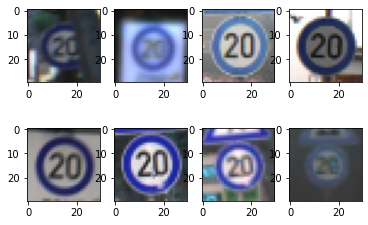

In [62]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainImg[i])

### Get training data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [63]:
from keras.preprocessing.image import ImageDataGenerator

In [64]:
datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.25) # set validation split

In [65]:
batch_size = 128

X_Train = datagen.flow_from_directory(
    project_path,
    target_size=(scale, scale),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training') # set as training data   

Found 14386 images belonging to 43 classes.


### Get validation data from ImageDataGenerator (5 Marks)
- Give directory path
- Give target size
- Give batch_size
- Specify classes, if you wish to use less number of classes you need to give class names in a list (Atleast 15 classes should be there)
- Specify class_mode
- Specify color_mode
- Specify subset

You can get details here
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [66]:
val_data = datagen.flow_from_directory(
    project_path,
    target_size=(scale, scale),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation') # set as validation data

Found 4786 images belonging to 43 classes.


### Define model (5 Marks)
- Initialize a Sequential Model
- Add Convolution, Maxpool, Dropout, Flatten & Dense layers according to your model architecture

In [68]:
input_shape=(32, 32, 3)

In [76]:
tf.keras.backend.clear_session()

model = Sequential()

In [77]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(43, activation=tf.nn.softmax))

### Compile the model (2 Marks)
- Specify optimizer, loss & metrics

In [78]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Get model summary (2 Marks)

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        1

### Fit the model (3 Marks)
- Specify epochs
- Specify batch_size
- Give validation_data
- Validation accuracy should be more than 90%

In [73]:
model_checkpoint =  ModelCheckpoint('German_traffic_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

In [80]:
epoch = 20
batch = 128

In [81]:
history = model.fit(X_Train, validation_data=val_data, epochs=epoch, batch_size=batch, verbose=1, callbacks=[model_checkpoint])

Epoch 1/20
113/113 [==============================] - ETA: 0s - loss: 1.4042 - accuracy: 0.5973
Epoch 00001: val_loss did not improve from 0.16239
113/113 [==============================] - 20s 173ms/step - loss: 1.4042 - accuracy: 0.5973 - val_loss: 2.8513 - val_accuracy: 0.0376
Epoch 2/20
113/113 [==============================] - ETA: 0s - loss: 0.4190 - accuracy: 0.8547
Epoch 00002: val_loss did not improve from 0.16239
113/113 [==============================] - 19s 171ms/step - loss: 0.4190 - accuracy: 0.8547 - val_loss: 2.1399 - val_accuracy: 0.4148
Epoch 3/20
113/113 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9140
Epoch 00003: val_loss did not improve from 0.16239
113/113 [==============================] - 19s 168ms/step - loss: 0.2450 - accuracy: 0.9140 - val_loss: 1.9476 - val_accuracy: 0.5261
Epoch 4/20
113/113 [==============================] - ETA: 0s - loss: 0.1565 - accuracy: 0.9445
Epoch 00004: val_loss did not improve from 0.16239
113/113 [=

### Draw plots (3 Marks)
- Plot training accuracy and validation accuracy with respect to epochs
- Plot training loss and validation loss with respect to epochs

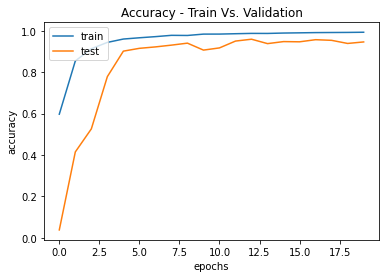

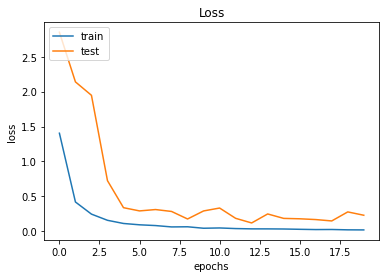

In [82]:
plt.figure(0)
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy - Train Vs. Validation')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()